### **Coding Etiquette & Excel Reporting II** (Final task)

##### **Contents**

##### 5. Step No. 5: Profiling customers
##### 6. Step No. 6: Distribution of profiles - visualization
##### 7. Step No. 7: Descriptive stats for frequency and expenditure
##### 8. Step No. 8: Comparison: customer profiles, regions, and departments

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Path

path = r'C:\Users\andd0\Documents\InstaCart Basket Analysis'

##### **Importing the latest dataframe**

In [3]:
# Importing dataframe

df_non_excluded = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'non_excluded.pkl'))

#### **Step No. 5**

##### **The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database.**

##### Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents.

##### You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 

##### (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [4]:
# Checking descriptive stats of some relevant variables

df_non_excluded[['age', 'income', 'n_dependents', 'prices', 'department_id']].describe()

,age,income,n_dependents,prices,department_id
count,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07,3.099266e+07
mean,4.946793e+01,9.967322e+04,1.501798e+00,7.794691e+00,9.924801e+00
std,1.848520e+01,4.313928e+04,1.118902e+00,4.241895e+00,6.282146e+00
min,1.800000e+01,2.590300e+04,0.000000e+00,1.000000e+00,1.000000e+00
25%,3.300000e+01,6.728900e+04,1.000000e+00,4.200000e+00,4.000000e+00
50%,4.900000e+01,9.676500e+04,2.000000e+00,7.400000e+00,9.000000e+00
75%,6.500000e+01,1.281010e+05,3.000000e+00,1.130000e+01,1.600000e+01
max,8.100000e+01,5.939010e+05,3.000000e+00,2.500000e+01,2.100000e+01


#### **Procedure**

##### **1)** First, I'll arbitrarily create five age groups:

##### 1. 18 - 30
##### 2. 31 - 45
##### 3. 46 - 60
##### 4. 61 - 75
##### 5. 76 - 81 

In [5]:
# Filters 1: 18 - 30 = 'young_adult'

df_non_excluded.loc[(df_non_excluded['age'] >= 18) & (df_non_excluded['age'] < 31), 'age_group'] = 'young_adult'

In [6]:
# Filters 2: 31 - 45 = 'established_adult'

df_non_excluded.loc[(df_non_excluded['age'] >= 31) & (df_non_excluded['age'] < 46), 'age_group'] = 'established_adult'

In [7]:
# Filters 3: 46 - 60 = 'mature_adult'

df_non_excluded.loc[(df_non_excluded['age'] >= 46) & (df_non_excluded['age'] < 61), 'age_group'] = 'mature_adult'

In [8]:
# Filters 4: 61 - 75 = 'senior_adult'

df_non_excluded.loc[(df_non_excluded['age'] >= 61) & (df_non_excluded['age'] < 76), 'age_group'] = 'senior_adult'

In [9]:
# Filters 5: 76 - 81 = 'elderly_adult'

df_non_excluded.loc[(df_non_excluded['age'] >= 76) & (df_non_excluded['age'] < 82), 'age_group'] = 'elderly_adult'

In [10]:
# Checking outcome

df_non_excluded[['age', 'age_group']].head(15)

,age,age_group
0,81,elderly_adult
1,81,elderly_adult
2,66,senior_adult
5,51,mature_adult
6,20,young_adult
7,65,senior_adult
8,72,senior_adult
9,72,senior_adult
10,61,senior_adult
11,19,young_adult


In [11]:
# Exploring

df_non_excluded.groupby('age_group')['n_dependents'].value_counts(normalize = True) * 100

age_group          n_dependents
elderly_adult      2               25.365185
                   1               25.030787
                   0               24.845121
                   3               24.758907
established_adult  1               25.182286
                   2               24.970099
                   0               24.950702
                   3               24.896912
mature_adult       3               25.368136
                   1               25.243984
                   0               24.998725
                   2               24.389155
senior_adult       2               25.548072
                   0               25.133965
                   3               25.054055
                   1               24.263908
young_adult        3               25.238835
                   1               24.982817
                   0               24.958887
                   2               24.819460
Name: proportion, dtype: float64

##### **Interpretation:**
##### According to these results, the number of dependents appears to be fairly evenly distributed across all age groups, with each dependent count (0 to 3) representing roughly 25% of the group. While the distribution is not perfectly uniform, the differences are minimal. As a result, the number of dependents may not be a strong differentiating factor between customer age groups, and may offer limited insights when used on its own.

##### **2)** Second: I'll create three income groups based on [this post](https://www.weforum.org/stories/2022/07/household-income-distribution-wealth-inequality-united-states/) from 2022 by the World Economic Forum:

##### 1. Lower class = < US 52,000 
##### 2. Middle class = US 52,000 - US 156,000
##### 3. Upper class = > US 156,000

In [12]:
# Filters 1: 

df_non_excluded.loc[df_non_excluded['income'] < 52000, 'income_class'] = 'lower_class'

In [13]:
# Filters 2: 

df_non_excluded.loc[(df_non_excluded['income'] >= 52000) & (df_non_excluded['income'] < 156000), 'income_class'] = 'middle_class'

In [14]:
# Filters 3: 

df_non_excluded.loc[df_non_excluded['income'] >= 156000, 'income_class'] = 'upper_class'

In [15]:
# Checking outcome

df_non_excluded[['user_id', 'income', 'income_class']].head(15)

,user_id,income,income_class
0,138,49620,lower_class
1,138,49620,lower_class
2,709,158302,upper_class
5,777,57797,middle_class
6,825,34171,lower_class
7,910,44856,lower_class
8,1052,153843,middle_class
9,1052,153843,middle_class
10,1379,42573,lower_class
11,1480,32283,lower_class


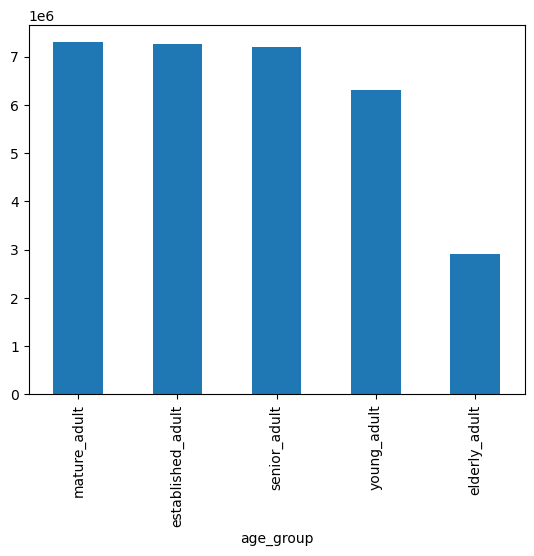

In [16]:
# Creating a visualization for categorical data: bar chart

viz_step5 = df_non_excluded['age_group'].value_counts().plot.bar()

In [17]:
viz_step5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'visualization_step_5.png'))

In [18]:
# Let's check how many customers belong to each group

df_non_excluded['age_group'].value_counts()

age_group
mature_adult         7291872
established_adult    7269066
senior_adult         7205624
young_adult          6310113
elderly_adult        2915989
Name: count, dtype: int64

##### Based on the data above, the customers will be classified by **age group** followed by their **income** category. 

##### Example, 'young_adult - middle_class' means a customer in the 18 - 30 age group whose income is less than 52K a year.

#### **Step No. 6**

##### **Create an appropriate visualization to show the distribution of profiles.**

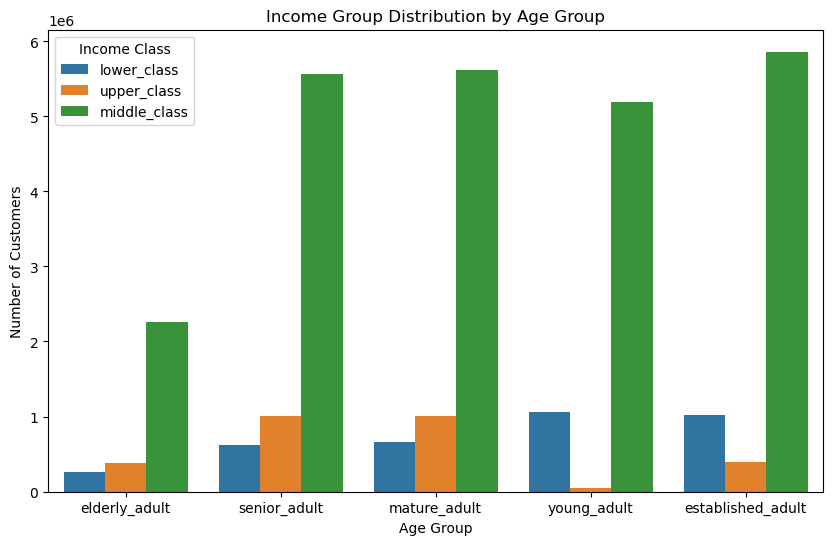

In [19]:
viz_profile_dist = plt.figure(figsize=(10, 6))
sns.countplot(data=df_non_excluded, x='age_group', hue='income_class')
plt.title('Income Group Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title='Income Class')
plt.show()

##### This grouped bar chart shows the customers profiles (age_group + income).

##### Each group specifies how age groups are split according to income. 

##### The middle class is prevalent across all profiles, followed by the upper class (except in young, and established adults).

##### Young adults have very little representation in the upper class.

In [20]:
# Exporting

viz_profile_dist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'viz_profile_dist_step_6.png'))

##### **Step No. 7**

##### **Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.**

In [21]:
df_non_excluded.groupby(['age_group', 'income_class'])[['days_since_prior_order', 'avg_spend_user']].agg(['max', 'mean', 'min'])

days_since_prior_order                  \
                                                  max       mean  min   
age_group         income_class                                          
elderly_adult     lower_class                    30.0  10.759262  0.0   
                  middle_class                   30.0  10.870135  0.0   
                  upper_class                    30.0  10.626402  0.0   
established_adult lower_class                    30.0  11.260637  0.0   
                  middle_class                   30.0  10.705584  0.0   
                  upper_class                    30.0  10.806559  0.0   
mature_adult      lower_class                    30.0  10.982656  0.0   
                  middle_class                   30.0  10.843334  0.0   
                  upper_class                    30.0  10.679696  0.0   
senior_adult      lower_class                    30.0  11.293527  0.0   
                  middle_class                   30.0  10.747945  0.0   
                  upper_class                    30.0  10.624803  0.0   
young_adult       lower_class                    30.0  11.202674  0.0   
                  middle_class                   30.0  10.769363  0.0   
                  upper_class                    30.0  10.350691  0.0   

                               avg_spend_user                      
                                          max      mean       min  
age_group         income_class                                     
elderly_adult     lower_class        7.508696  6.506385  1.933333  
                  middle_class      14.138776  7.917932  2.433333  
                  upper_class       11.976667  7.947535  4.419756  
established_adult lower_class       11.857143  6.903711  1.000000  
                  middle_class      18.233333  7.944672  2.046154  
                  upper_class       14.100000  7.906642  5.153573  
mature_adult      lower_class        7.630952  6.505336  1.000000  
                  middle_class      15.107692  7.917572  1.522222  
                  upper_class       20.114286  7.944110  5.715897  
senior_adult      lower_class        7.968000  6.523807  1.262500  
                  middle_class      19.400000  7.920478  1.300000  
                  upper_class       13.083333  7.947911  4.346667  
young_adult       lower_class       13.878571  6.977050  1.628571  
                  middle_class      14.900000  7.951633  4.626667  
                  upper_class        9.503851  7.757799  5.605854

##### On average, customers across all age and income profiles place orders every 10 to 11 days, with some variation by group. Their average spending per order typically ranges from USD 6 to USD 8, though some groups spend slightly more or less.

##### **Step No. 8**

##### Compare your customer profiles with regions and departments. 

##### Can you identify a link between them? 

##### Customers may demonstrate different behaviors across regions, which could make this information important.

In [22]:
df_non_excluded['customer_profile'] = df_non_excluded['age_group'] + ' | ' + df_non_excluded['income_class']

In [23]:
df_non_excluded[['user_id', 'customer_profile']].head(15)

,user_id,customer_profile
0,138,elderly_adult | lower_class
1,138,elderly_adult | lower_class
2,709,senior_adult | upper_class
5,777,mature_adult | middle_class
6,825,young_adult | lower_class
7,910,senior_adult | lower_class
8,1052,senior_adult | middle_class
9,1052,senior_adult | middle_class
10,1379,senior_adult | lower_class
11,1480,young_adult | lower_class


##### Customer profiles and regions

In [24]:
df_non_excluded['region'].value_counts(dropna = False)

region
South        10320462
West          7934427
Midwest       7267707
Northeast     5470068
Name: count, dtype: int64

In [25]:
# Trying one visualization per region and customer profile

region_name = 'Midwest'
df_midwest = df_non_excluded[df_non_excluded['region'] == region_name]

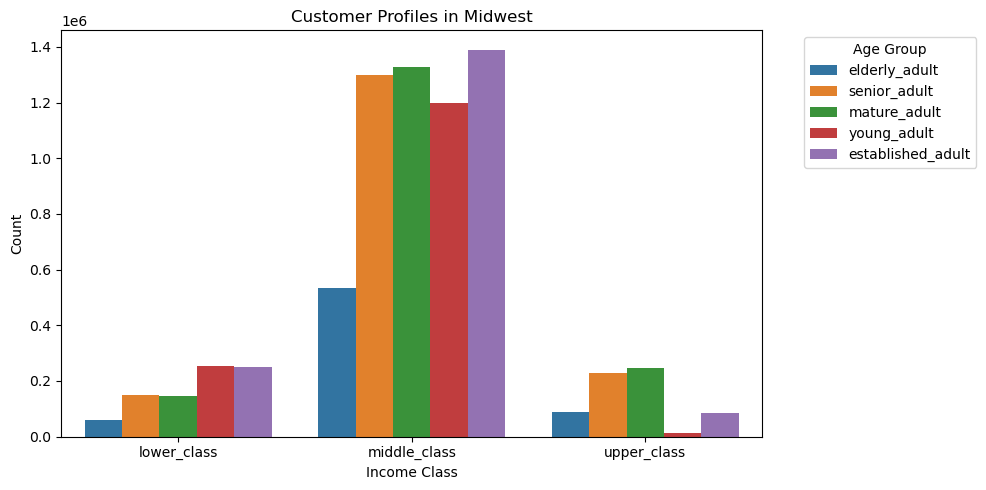

In [26]:
# Plotting

viz_custprof_regions_1 = plt.figure(figsize=(10, 5))
sns.countplot(data=df_midwest, x='income_class', hue='age_group')
plt.title(f'Customer Profiles in {region_name}')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [27]:
# Exporting visualization

viz_custprof_regions_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'viz_custprof_regions_1_step_8.png'))

In [28]:
region_name = 'West'
df_west = df_non_excluded[df_non_excluded['region'] == region_name]

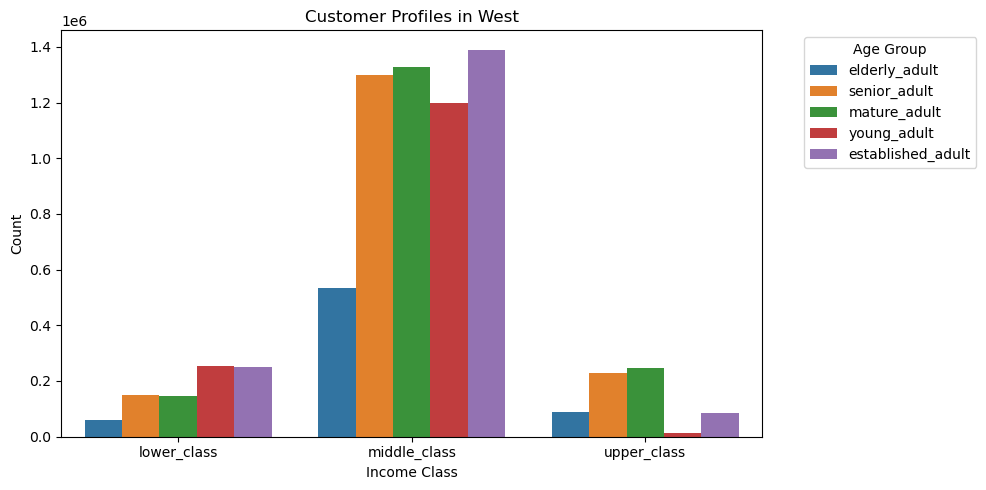

In [29]:
viz_custprof_regions_2 = plt.figure(figsize=(10, 5))
sns.countplot(data=df_midwest, x='income_class', hue='age_group')
plt.title(f'Customer Profiles in {region_name}')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [30]:
# Exporting visualization

viz_custprof_regions_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'viz_custprof_regions_2_step_8.png'))

In [31]:
region_name = 'Northeast'
df_northeast = df_non_excluded[df_non_excluded['region'] == region_name]

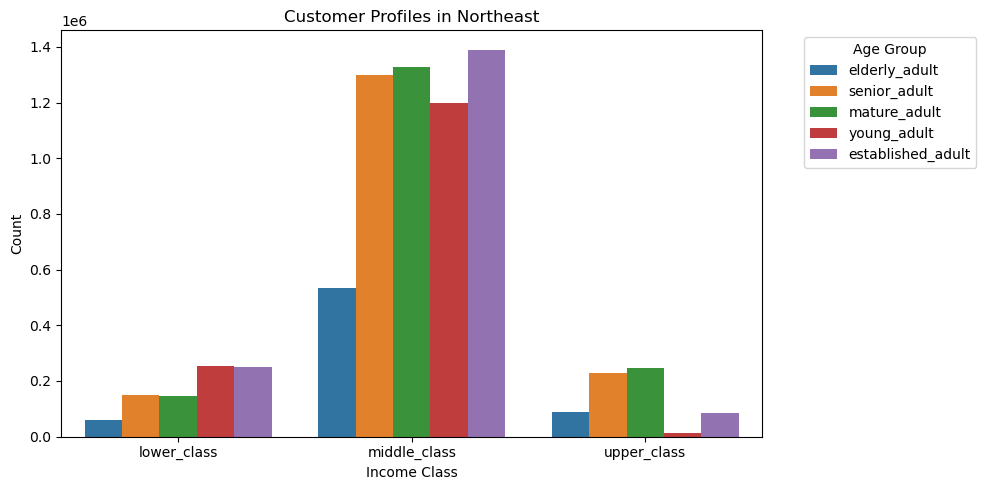

In [32]:
viz_custprof_regions_3 = plt.figure(figsize=(10, 5))
sns.countplot(data=df_midwest, x='income_class', hue='age_group')
plt.title(f'Customer Profiles in {region_name}')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [33]:
# Exporting visualization

viz_custprof_regions_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'viz_custprof_regions_3_step_8.png'))

In [34]:
region_name = 'South'
df_south = df_non_excluded[df_non_excluded['region'] == region_name]

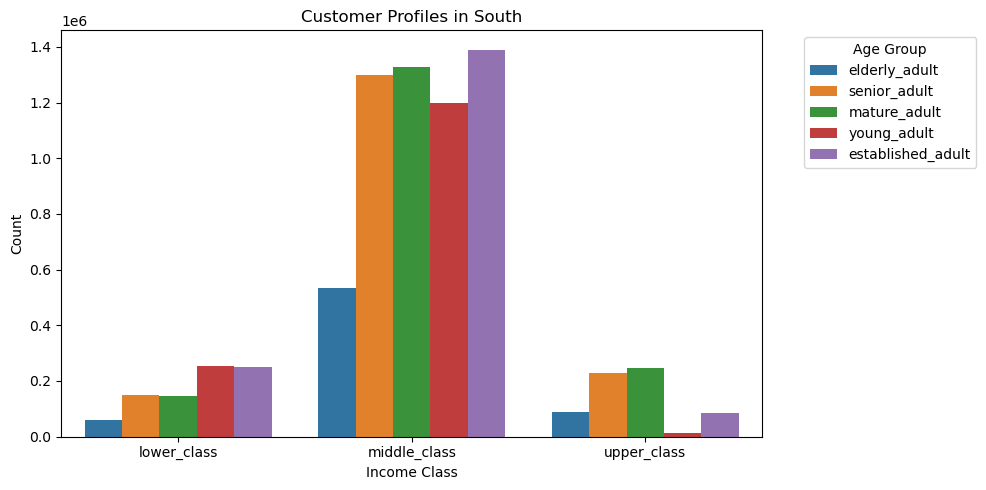

In [35]:
viz_custprof_regions_4 = plt.figure(figsize=(10, 5))
sns.countplot(data=df_midwest, x='income_class', hue='age_group')
plt.title(f'Customer Profiles in {region_name}')
plt.xlabel('Income Class')
plt.ylabel('Count')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [36]:
# Exporting visualization

viz_custprof_regions_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'viz_custprof_regions_4_step_8.png'))

##### Consistent with the visualization in the Step No. 6, the customers across all regions mostly belong to the middle class.

##### Regions and department_id

In [37]:
# Step 1: Count department frequency by region
dept_counts = df_non_excluded.groupby(['region', 'department_id']).size().reset_index(name='order_count')

In [38]:
# Step 2: Get top 3 departments per region
top3_per_region = dept_counts.sort_values(['region', 'order_count'], ascending=[True, False])

In [39]:
top3_per_region = top3_per_region.groupby('region').head(3)

In [40]:
# Add department names
dept_dict = {
    1: 'frozen',
    2: 'other',
    3: 'bakery',
    4: 'produce',
    5: 'alcohol',
    6: 'international',
    7: 'beverages',
    8: 'pets',
    9: 'dry goods pasta',
    10: 'bulk',
    11: 'personal care',
    12: 'meat seafood',
    13: 'pantry',
    14: 'breakfast',
    15: 'canned goods',
    16: 'dairy eggs',
    17: 'household',
    18: 'babies',
    19: 'snacks',
    20: 'deli',
    21: 'missing'
}

In [41]:
top3_per_region['department_name'] = top3_per_region['department_id'].map(dept_dict)

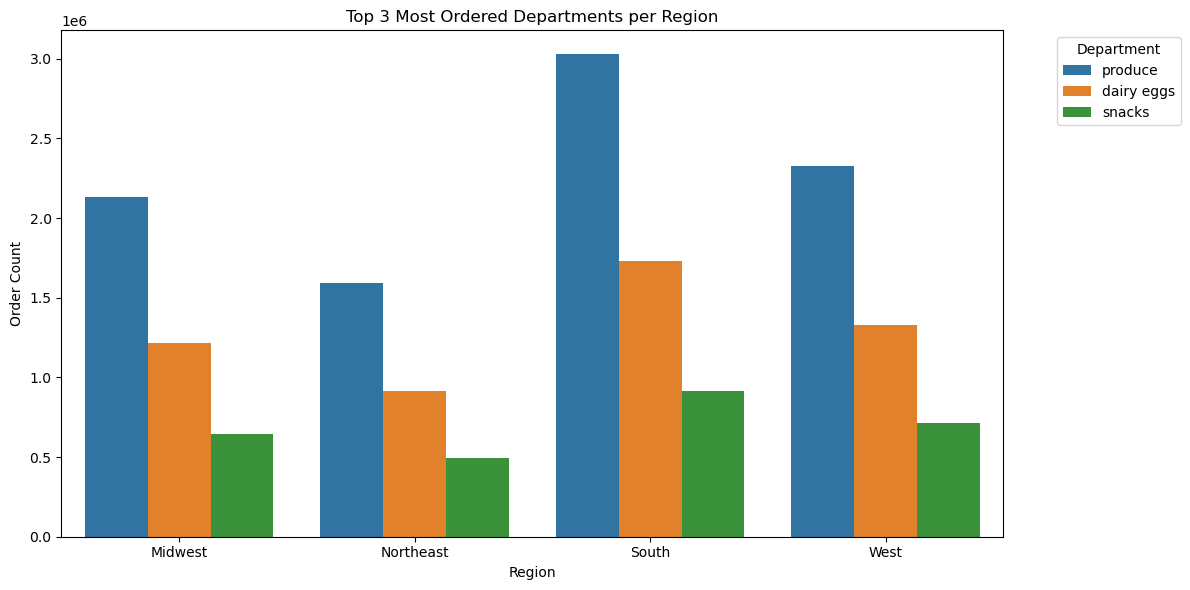

In [42]:
# Step 3: Plot
viz_top_3_deps = plt.figure(figsize=(12, 6))
sns.barplot(data=top3_per_region, x='region', y='order_count', hue='department_name')
plt.title('Top 3 Most Ordered Departments per Region')
plt.ylabel('Order Count')
plt.xlabel('Region')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### When it comes to customers' ordering behavior, three types of products stand out: produce, dairy eggs, and snacks. 

In [43]:
# Exporting visualization

viz_top_3_deps.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'viz_top_3_deps.png'))

##### **All of the 21 depts**

In [51]:
overall_totals = dept_counts.groupby('department_name')['order_count'].sum().sort_values(ascending=False)

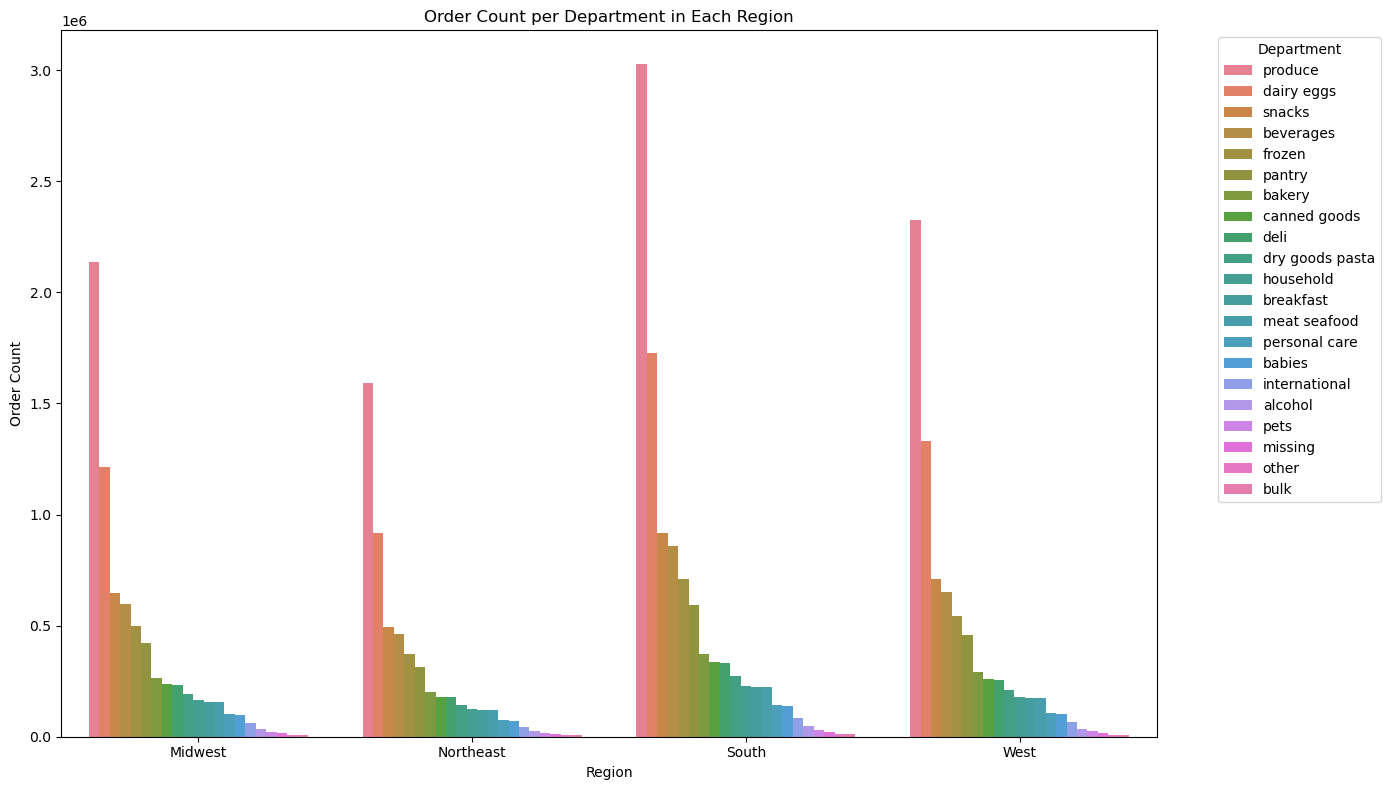

In [52]:
# Set order of departments by total order count
plt.figure(figsize=(14, 8))
sns.barplot(
    data=dept_counts,
    x='region',
    y='order_count',
    hue='department_name',
    hue_order=overall_totals.index  # ensures bars appear in descending order
)

plt.title('Order Count per Department in Each Region')
plt.ylabel('Order Count')
plt.xlabel('Region')
plt.legend(title='Department', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

##### **Additional/bonus checks**

In [44]:
# Order frequency considering age and family status

df_non_excluded.groupby(['age_group', 'fam_status'])['days_since_prior_order'].mean()

age_group          fam_status                      
elderly_adult      divorced/widowed                    10.819384
                   married                             10.830653
established_adult  married                             10.786582
                   single                              10.793136
mature_adult       divorced/widowed                    10.961221
                   married                             10.868782
                   single                              10.711913
senior_adult       divorced/widowed                    10.709884
                   married                             10.800568
young_adult        living with parents and siblings    10.750739
                   married                             10.826500
                   single                              10.946397
Name: days_since_prior_order, dtype: float64

##### If I include the family status (marital status) variable, the order frequency does not vary significantly between age groups

In [45]:
# Number of orders considering age and family status

df_non_excluded.groupby(['age_group', 'fam_status'])['order_id'].nunique()

age_group          fam_status                      
elderly_adult      divorced/widowed                     71980
                   married                             218517
established_adult  married                             537550
                   single                              180803
mature_adult       divorced/widowed                     11563
                   married                             540476
                   single                              170365
senior_adult       divorced/widowed                    177798
                   married                             535269
young_adult        living with parents and siblings    145384
                   married                             319554
                   single                              155286
Name: order_id, dtype: int64

In [46]:
# Visualization for No. of orders considering age and family status

orders_by_profile = df_non_excluded.groupby(['age_group', 'fam_status'])['order_id'].nunique().reset_index()

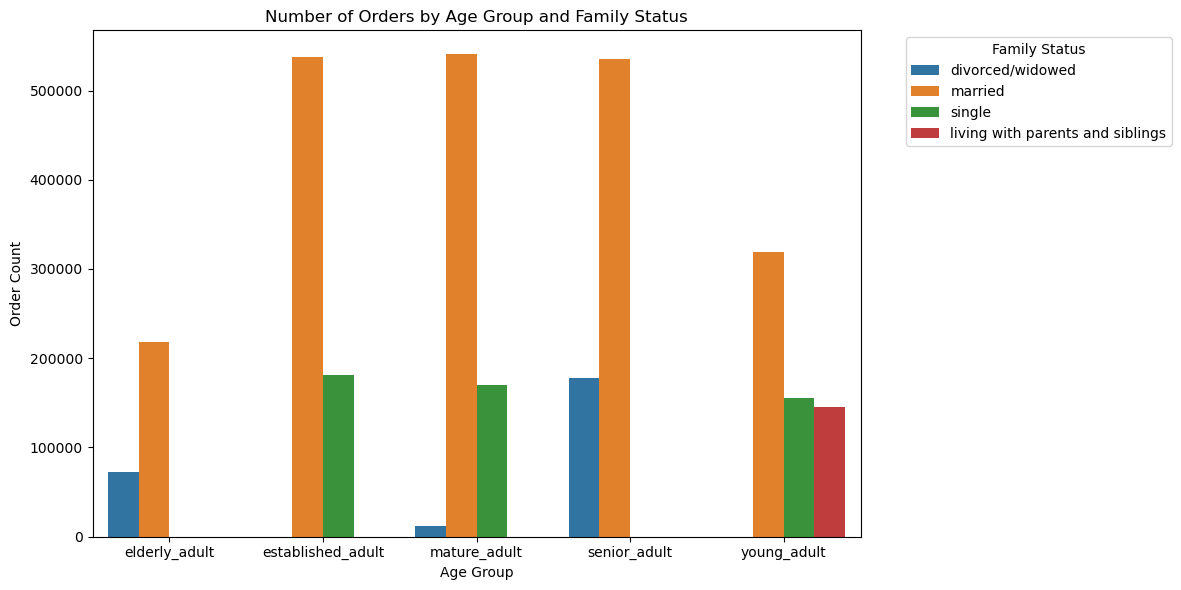

In [47]:
viz_ords_by_age_fam = plt.figure(figsize=(12, 6))
sns.barplot(data=orders_by_profile, x='age_group', y='order_id', hue='fam_status')
plt.title('Number of Orders by Age Group and Family Status')
plt.ylabel('Order Count')
plt.xlabel('Age Group')
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### **Some notes about this visualization**

##### Married customers across all age groups order more than customers with a different marital status 

##### Divorced/widowed mature adults place the least orders

In [48]:
# Exporting visualization

viz_ords_by_age_fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'viz_ords_by_age_fam.png'))